In [ ]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

TensorFlow Version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00


Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)


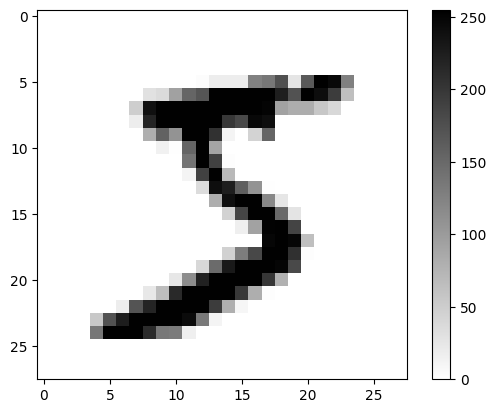

The label for the above image is: 5


In [ ]:
# Let's check the shape of our data
print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing images:", x_test.shape)
print("Shape of testing labels:", y_test.shape)

# Let's see what a sample image and label look like
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print(f"The label for the above image is: {y_train[0]}")

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape the images to have a single color channel
# CNNs expect input of shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("New shape of training images:", x_train.shape)

New shape of training images: (60000, 28, 28, 1)


In [ ]:
# We have 10 classes (digits 0-9)
num_classes = 10

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Example of a one-hot encoded label:")
print(f"Original label was {np.argmax(y_train[0])}, one-hot encoded is {y_train[0]}")

Example of a one-hot encoded label:
Original label was 5, one-hot encoded is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Build the Sequential model
model = keras.Sequential([
    # 1. Convolutional Layer: Learns 32 different filters. The 'kernel_size' is the size of the filter.
    # 'input_shape' is only needed for the first layer.
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 2. Max Pooling Layer: Downsamples the image, reducing its dimensions.
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 3. Another Convolutional Layer: Learns more complex features.
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # 4. Another Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 5. Flatten Layer: Flattens the 2D image data into a 1D vector.
    keras.layers.Flatten(),

    # 6. Dropout Layer: A regularization technique to prevent overfitting.
    # It randomly sets 50% of the input units to 0 during training.
    keras.layers.Dropout(0.5),

    # 7. Dense (Output) Layer: The final decision-making layer. 'softmax' activation
    # ensures the output is a probability distribution across all 10 classes.
    keras.layers.Dense(num_classes, activation='softmax')
])

# Let's see a summary of our model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
# batch_size: number of samples processed before the model is updated
# epochs: number of complete passes through the training dataset
# validation_data: data on which to evaluate the loss and any model metrics at the end of each epoch.
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.7787 - loss: 0.7085 - val_accuracy: 0.9760 - val_loss: 0.0883
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9651 - loss: 0.1151 - val_accuracy: 0.9827 - val_loss: 0.0546
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9737 - loss: 0.0816 - val_accuracy: 0.9856 - val_loss: 0.0438
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9781 - loss: 0.0730 - val_accuracy: 0.9858 - val_loss: 0.0406
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9799 - loss: 0.0615 - val_accuracy: 0.9878 - val_loss: 0.0371
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9825 - loss: 0.0570 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9888 - val_loss: 0.0304
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9848 - loss: 0.0482 - 

In [ ]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025026213377714157
Test accuracy: 0.9918000102043152


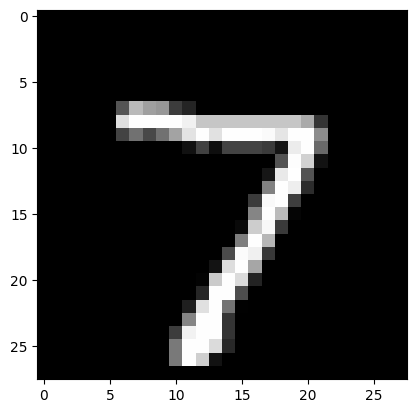

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The model predicts this digit is a: 7
The actual digit is a: 7


In [ ]:
# Grab an image from the test set
sample_image = x_test[0]
true_label = np.argmax(y_test[0]) # Get the true digit

# Display the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.show()

# The model expects a batch of images, so we add an extra dimension
prediction = model.predict(np.expand_dims(sample_image, axis=0))

# The prediction is an array of probabilities. We find the index of the highest probability.
predicted_label = np.argmax(prediction)

print(f"The model predicts this digit is a: {predicted_label}")
print(f"The actual digit is a: {true_label}")

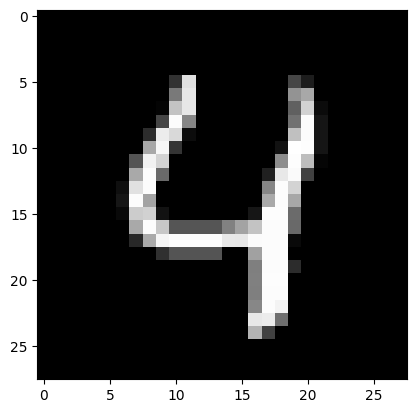

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model predicts this digit is a: 4
The actual digit is a: 4


In [ ]:
# Grab another image from the test set
sample_image_2 = x_test[4]
true_label_2 = np.argmax(y_test[4]) # Get the true digit

# Display the image
plt.imshow(sample_image_2.reshape(28, 28), cmap='gray')
plt.show()

# The model expects a batch of images, so we add an extra dimension
prediction_2 = model.predict(np.expand_dims(sample_image_2, axis=0))

# The prediction is an array of probabilities. We find the index of the highest probability.
predicted_label_2 = np.argmax(prediction_2)

print(f"The model predicts this digit is a: {predicted_label_2}")
print(f"The actual digit is a: {true_label_2}")

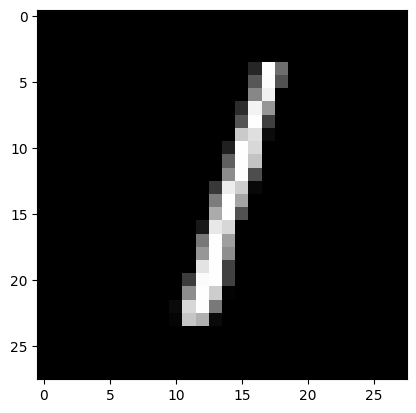

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The model predicts this digit is a: 1
The actual digit is a: 4


In [ ]:
# Grab another image from the test set
sample_image_2 = x_test[2]
true_label_2 = np.argmax(y_test[4]) # Get the true digit

# Display the image
plt.imshow(sample_image_2.reshape(28, 28), cmap='gray')
plt.show()

# The model expects a batch of images, so we add an extra dimension
prediction_2 = model.predict(np.expand_dims(sample_image_2, axis=0))

# The prediction is an array of probabilities. We find the index of the highest probability.
predicted_label_2 = np.argmax(prediction_2)

print(f"The model predicts this digit is a: {predicted_label_2}")
print(f"The actual digit is a: {true_label_2}")

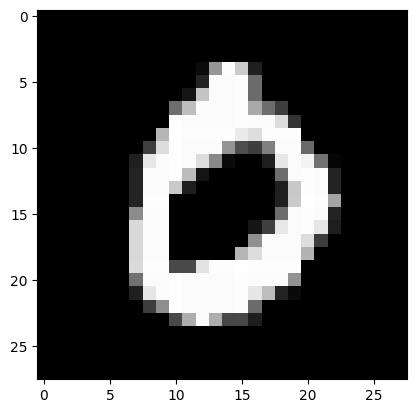

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model predicts this digit is a: 0
The actual digit is a: 0


In [ ]:

# Grab another image from the test set
sample_image_4 = x_test[3]
true_label_4 = np.argmax(y_test[3]) # Get the true digit

# Display the image
plt.imshow(sample_image_4.reshape(28, 28), cmap='gray')
plt.show()

# The model expects a batch of images, so we add an extra dimension
prediction_4 = model.predict(np.expand_dims(sample_image_4, axis=0))

# The prediction is an array of probabilities. We find the index of the highest probability.
predicted_label_4 = np.argmax(prediction_4)

print(f"The model predicts this digit is a: {predicted_label_4}")
print(f"The actual digit is a: {true_label_4}")

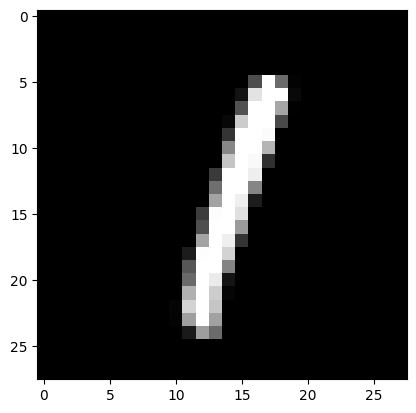

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model predicts this digit is a: 1
The actual digit is a: 1


In [ ]:

sample_image_5 = x_test[5]
true_label_5 = np.argmax(y_test[5]) # Get the true digit

# Display the image
plt.imshow(sample_image_5.reshape(28, 28), cmap='gray')
plt.show()

# The model expects a batch of images, so we add an extra dimension
prediction_5 = model.predict(np.expand_dims(sample_image_5, axis=0))

# The prediction is an array of probabilities. We find the index of the highest probability.
predicted_label_5 = np.argmax(prediction_5)

print(f"The model predicts this digit is a: {predicted_label_5}")
print(f"The actual digit is a: {true_label_5}")